In [1]:
from data_clean import remove_221_rows, dropping_no_betting_data, josh_features, fill_f_pm_01m, class_or_rating_average, oli_features
from v2_preprocessor import preprocess_features_v2
import pandas as pd

data  = pd.read_csv("../raw_data/raw_data_v2.2.csv")

data_cleaned = remove_221_rows(data)
data_cleaned = dropping_no_betting_data(data_cleaned)
data_cleaned = josh_features(data_cleaned)
data_cleaned = class_or_rating_average(data_cleaned)
data_cleaned = oli_features(data_cleaned)
data_cleaned = fill_f_pm_01m(data_cleaned)



preprocessed_data = preprocess_features_v2(data_cleaned)

preprocessed_data.to_csv("../raw_data/data_cleaned_and_preprocessed.csv", index=False)

data = pd.read_csv("../raw_data/data_cleaned_and_preprocessed.csv")
data.sort_values(by='f_ko')
data = data.reset_index(drop=True)



/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_20024/3225624684.py:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data  = pd.read_csv("../raw_data/raw_data_v2.2.csv")


first 221 rows removed. New shape = (118354, 116)


/Users/joshstone/code/lucasglanville/and_theyre_off_backend/Preprocessing/data_clean.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_impute] = data[columns_to_impute].apply(impute_row, axis=1)


Cleaned up missing odds. New shape = (118093, 116)
Added Josh features. New shape = (118093, 123)
Added Oli features 2/4. New shape = (118093, 125)
Added Oli features 4/4. New shape = (118093, 127)
number of columns:  128
✅ DROPPED IRRELEVANT COLUMNS
✅ DROPPED ROWS WITH NULL VALUES
✅ WHITESPACE STRIPPED FROM 'f_track'
✅ ODDS CONVERTED TO PROBABILITY (1/ODDS)
✅ WINNERS CODED AS '1', REST '0'
✅ 'f_ko' CONVERTED TO DATETIME
✅ TRACK CONDITIONS ORDINALLY ENCODED
✅ NUMERIC FEATURES MINMAX-SCALED
✅ IMPUTED 'no_headgear' for NULLS IN 'f_headgear'
✅ IMPUTED MEAN FOR NULLS IN 'f_dob' & 'f_prb_avg'
✅ IMPUTED '0' FOR NULLS IN 68 x FEATURES
✅ CAT. FEATURES OH-ENCODED (Track, Headgear, Country)
number of columns:  88
✅ COLUMN TRANSFORMER ASSEMBLED
⏳ FIT_TRANSFORMING THE PREPROCESSING PIPE...
number of columns:  164
✅ DATA PROCESSED WITH SHAPE: (117468, 164)


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head(2)

,f_going,average_or_rating_class,above_below_official_rating_class,PreviousPosition,PredictedRank,f_distance,f_class,f_age,f_pace,f_weight,f_runners,f_rating_or,mean_f_rating_or_race,or_rating_vs_avg_race,f_rating_rbd,f_stall,stall_position,trainer_runs_win_at,trainer_runs_win_l200r,trainer_runs_win_l50r,trainer_runs_win_l16r,trainer_runs_at,trainer_runs_l200r,trainer_runs_l50r,trainer_runs_l16r,jockey_runs_win_at,jockey_runs_win_l200r,jockey_runs_win_l50r,jockey_runs_win_l16r,jockey_runs_at,jockey_runs_l200r,jockey_runs_l50r,jockey_runs_l16r,horse_runs_win_at,horse_runs_win_l10r,horse_runs_win_l5r,horse_runs_win_l2r,horse_runs_at,horse_runs_l10r,horse_runs_l5r,horse_runs_l2r,iv_horse_at,iv_trainer_l200r,iv_trainer_l50r,iv_trainer_l16r,iv_trainer_at,iv_jockey_l200r,iv_jockey_l50r,iv_jockey_l16r,iv_jockey_at,ae_horse_l10r,ae_horse_l5r,ae_horse_l2r,ae_horse_at,ae_trainer_l200r,ae_trainer_l50r,ae_trainer_l16r,ae_trainer_at,ae_jockey_l200r,ae_jockey_l50r,ae_jockey_l16r,ae_jockey_at,rolling_avg_trainer_finish_at,rolling_avg_trainer_finish_l200r,rolling_avg_trainer_finish_l50r,rolling_avg_trainer_finish_l16r,rolling_avg_horse_finish_at,rolling_avg_horse_finish_l10r,rolling_avg_horse_finish_l5r,rolling_avg_horse_finish_l2r,rolling_avg_jockey_finish_at,rolling_avg_jockey_finish_l200r,rolling_avg_jockey_finish_l50r,rolling_avg_jockey_finish_l16r,f_track_ASCOT,f_track_AYR,f_track_BALLINROBE,f_track_BATH,f_track_BELLEWSTOWN,f_track_BEVERLEY,f_track_BRIGHTON,f_track_CARLISLE,f_track_CATTERICK,f_track_CHELMSFORD CITY,f_track_CHEPSTOW,f_track_CHESTER,f_track_CLONMEL,f_track_CORK,f_track_CURRAGH,f_track_DONCASTER,f_track_DOWN ROYAL,f_track_DUNDALK,f_track_EPSOM,f_track_FAIRYHOUSE,f_track_FFOS LAS,f_track_GALWAY,f_track_GOODWOOD,f_track_GOWRAN PARK,f_track_HAMILTON,f_track_HAYDOCK,f_track_KEMPTON,f_track_KILLARNEY,f_track_LAYTOWN,f_track_LEICESTER,f_track_LEOPARDSTOWN,f_track_LIMERICK,f_track_LINGFIELD,f_track_LISTOWEL,f_track_MUSSELBURGH,f_track_NAAS,f_track_NAVAN,f_track_NEWBURY,f_track_NEWCASTLE,f_track_NEWMARKET,f_track_NOTTINGHAM,f_track_PONTEFRACT,f_track_PUNCHESTOWN,f_track_REDCAR,f_track_RIPON,f_track_ROSCOMMON,f_track_SALISBURY,f_track_SANDOWN,f_track_SLIGO,f_track_SOUTHWELL,f_track_THIRSK,f_track_THURLES,f_track_TIPPERARY,f_track_TRAMORE,f_track_WETHERBY,f_track_WINDSOR,f_track_WOLVERHAMPTON,f_track_YARMOUTH,f_track_YORK,f_headgear_B,f_headgear_BC,f_headgear_C,f_headgear_EB,f_headgear_ET,f_headgear_H,f_headgear_HB,f_headgear_HC,f_headgear_HE,f_headgear_HT,f_headgear_HV,f_headgear_T,f_headgear_TB,f_headgear_TC,f_headgear_TV,f_headgear_V,f_headgear_VC,f_headgear_no_headgear,country_GB,country_IRE,f_dob,f_prb_avg,id,f_id,f_ko,f_horse,pred_isp,f_place,f_pm_01m,f_pm_01m_p_back,linear_target
0,0.4,0.836105,0.643877,0.0,0.000000,0.0,0.166667,0.25,0.7,0.21875,0.15625,0.703704,0.850515,0.597311,0.916667,0.027778,0.148019,0.0,0.0,0.0,0.0,0.001919,0.025,0.10,0.3125,0.004219,0.019231,0.052632,0.125,0.001053,0.01,0.04,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.499485,0.499484,0.5,0.478974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014276,0.014276,0.014276,0.014276,0.231883,0.231883,0.231883,0.231883,0.0,0.0,0.0,0.0,0.142857,0.142857,0.142857,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.404181,0.434968,16149939000396,16149939000030,2021-03-06 01:25:00,Tone The Barone,0.400000,0,2.28,-1.0,-1.0
1,0.4,0.836105,0.691321,0.0,0.032258,0.0,0.166667,0.50,0.5,0.34375,0.15625,0.755556,0.850515,0.645049,0.845238,0.138889,0.480479,0.0,0.0,0.0,0.0,0.000768,0.010,0.04,0.1250,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00

In [10]:
backtest = data[['f_ko','f_id', 'id','f_horse','f_pm_01m', 'linear_target', 'f_place']]

# #X = data[['f_runners','or_rating_vs_avg_race', 'stall_position', 
#           'iv_horse_at', 'iv_trainer_l200r', 'iv_trainer_l50r', 'iv_trainer_l16r', 'iv_trainer_at',
#           'iv_jockey_l200r', 'iv_jockey_l50r', 'iv_jockey_l16r', 'iv_jockey_at',
#           'ae_horse_l10r', 'ae_horse_l5r' , 'ae_horse_l2r' ,'ae_horse_at',
#           'ae_trainer_l200r' , 'ae_trainer_l50r' , 'ae_trainer_l16r' , 'ae_trainer_at',
#           'ae_jockey_l200r' , 'ae_jockey_l50r', 'ae_jockey_l16r' , 'ae_jockey_at' , 'f_dob', 'f_prb_avg', 'pred_isp']]


X = data[['f_runners','or_rating_vs_avg_race', 'stall_position', 
          'iv_trainer_l50r', 'iv_jockey_l50r', 'ae_horse_l5r' ,
          'ae_trainer_l50r' ,'ae_jockey_l50r', 'f_dob', 'f_prb_avg', 'pred_isp']]







y = data["linear_target"] #OR 'linear_target'

print(data.shape)
print(X.shape)
print(y.shape)
print(backtest.shape)

#Train = Year 1
#Val = Year 2
#Test = Year 3 (6 months)


X_train = X.iloc[:70000]
X_val = X.iloc[70000:91429]
X_test = X.iloc[91429:]
y_train = y.iloc[:70000]
y_val = y.iloc[70000:91429]
y_test = y.iloc[91429:]
backtest_train = backtest.iloc[:70000]
backtest_val = backtest.iloc[70000:91429]
backtest_test = backtest.iloc[91429:]

#backtesting=data.iloc[91432:]

#X_train=X.iloc[:73753]
#X_val=X.iloc[73753:91432]
#X_test=X.iloc[91432:]
#y_train=y.iloc[:73753]
#y_val=y.iloc[73753:91432]
#y_test=y.iloc[91432:]


(117468, 164)
(117468, 11)
(117468,)
(117468, 7)


In [41]:
X_train.tail(2)

,f_runners,or_rating_vs_avg_race,stall_position,iv_trainer_l50r,iv_jockey_l50r,ae_horse_l5r,ae_trainer_l50r,ae_jockey_l50r,f_dob,f_prb_avg,pred_isp
69998,0.09375,0.645829,0.214523,0.100103,0.080495,0.0,0.010058,0.007654,0.20,0.46,0.400000
69999,0.09375,0.550352,0.330890,0.200206,0.140351,0.0,0.020758,0.013330,0.38,0.26,0.266667


In [42]:
X_train.shape

(70000, 11)

In [43]:
# convert labels to a one-hot vector
# from tensorflow.keras.utils import to_categorical

# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

# define network architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Accuracy, Recall

MLP = Sequential()
MLP.add(InputLayer(input_shape=(11, ))) # input layer
MLP.add(Dense(32, activation='relu')) # hidden layer 2
MLP.add(Dropout(0.2))
MLP.add(Dense(16, activation='relu')) # hidden layer 2
MLP.add(Dropout(0.2))
MLP.add(Dense(1, activation='linear')) # output layer


In [44]:
# optimization
MLP.compile(loss='mse',
            optimizer='adam',
            metrics=['mae'])

In [45]:
from tensorflow.keras.callbacks import EarlyStopping
# train (fit)

es = EarlyStopping(patience=5, restore_best_weights=True)

history = MLP.fit(X_train, y_train, 
                  epochs=20, batch_size=64, verbose=1,
                  validation_data=(X_val, y_val), callbacks = [es])

Epoch 1/20
1094/1094 [==============================] - 1s 506us/step - loss: 23.2294 - mae: 1.7112 - val_loss: 33.7629 - val_mae: 1.7426
Epoch 2/20
1094/1094 [==============================] - 1s 463us/step - loss: 23.2231 - mae: 1.7055 - val_loss: 33.7667 - val_mae: 1.7978
Epoch 3/20
1094/1094 [==============================] - 1s 466us/step - loss: 23.2210 - mae: 1.7098 - val_loss: 33.7616 - val_mae: 1.7614
Epoch 4/20
1094/1094 [==============================] - 1s 466us/step - loss: 23.2192 - mae: 1.7082 - val_loss: 33.7646 - val_mae: 1.7407
Epoch 5/20
1094/1094 [==============================] - 1s 462us/step - loss: 23.2185 - mae: 1.7092 - val_loss: 33.7634 - val_mae: 1.7300
Epoch 6/20
1094/1094 [==============================] - 1s 462us/step - loss: 23.2182 - mae: 1.7019 - val_loss: 33.7623 - val_mae: 1.7449
Epoch 7/20
1094/1094 [==============================] - 1s 464us/step - loss: 23.2198 - mae: 1.7116 - val_loss: 33.7625 - val_mae: 1.7416
Epoch 8/20
1094/1094 [============

In [61]:
# evaluate performance on test data
test_loss, test_acc = MLP.evaluate(X_test, y_test,
                                         batch_size=64,
                                         verbose=1)
print("Test loss:", test_loss)
print("Test mae:", test_acc)

407/407 [==============================] - 0s 297us/step - loss: nan - mae: nan
Test loss: nan
Test mae: nan


In [47]:
y_pred = MLP.predict(X_test)

814/814 [==============================] - 0s 227us/step


In [48]:
y_pred

array([[-0.0384361 ],
       [-0.02714098],
       [-0.02723045],
       ...,
       [-0.02859861],
       [-0.03887936],
       [-0.03644545]], dtype=float32)

<Axes: ylabel='Count'>

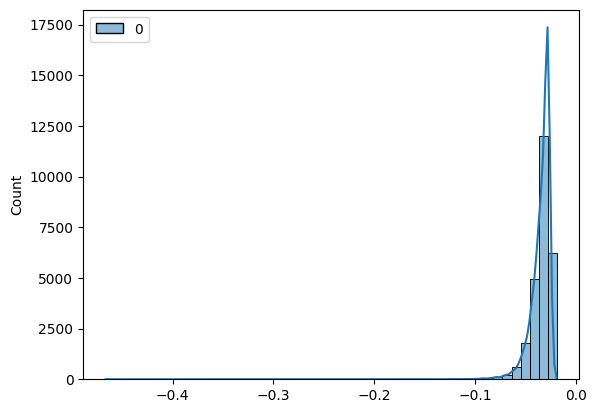

In [49]:
import seaborn as sns
sns.histplot(y_pred, bins = 50, kde=True)

In [22]:
backtest_test['model_preds'] = y_pred

/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_20024/1787826085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_test['model_preds'] = y_pred


In [ ]:

all_bets = backtest_test
above0 = backtest_test[backtest_test['model_preds'] >= -0.05]
above5 = backtest_test[backtest_test['model_preds'] >= -0.04]
above10 = backtest_test[backtest_test['model_preds'] >= -0.03]
above15 = backtest_test[backtest_test['model_preds'] >= -0.02]
above20 = backtest_test[backtest_test['model_preds'] >= -0.01]
above30 = backtest_test[backtest_test['model_preds'] >= 0]

In [50]:
from sklearn.linear_model import SGDRegressor

In [51]:
Model2 = SGDRegressor(max_iter=1000, tol=1e-3)

In [52]:
Model2.fit(X_train, y_train)

SGDRegressor()

In [53]:
score = Model2.score(X_train, y_train)

In [54]:
score

-0.0003220394546066263

In [56]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt 

In [57]:
X_train = X.iloc[:70000]
X_val = X.iloc[70000:91429]
X_test = X.iloc[91429:]
y_train = y.iloc[:70000]
y_val = y.iloc[70000:91429]
y_test = y.iloc[91429:]
X_trainval = X.iloc[:91429]
y_trainval = y.iloc[:91429]

In [58]:
cv_score = cross_val_score(Model2, X_trainval, y_trainval, cv = 10)

In [60]:
cv_score.mean()

-0.00046978492413136675